In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/intro_data_science/HT_2013_2023.csv')

In [5]:
df.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT,OTHER_COUNT
0,2013,MO0950000,St. Louis County Police Department,NaN,County,MO,Missouri,West North Central,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",HTCSA,Human Trafficking,Commercial Sex Acts,6,0.0,6,0,NaN
1,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0,NaN
2,2013,OH0020000,Allen,NaN,County,NaN,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTIS,Human Trafficking,Involuntary Servitude,1,0.0,0,0,NaN
3,2013,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0,NaN
4,2013,TNMPD0000,Memphis,NaN,City,TN,Tennessee,East South Central,SHELBY,South,1B,"Cities from 500,000 thru 999,999",HTCSA,Human Trafficking,Commercial Sex Acts,3,0.0,2,0,NaN


Task 1:

In [6]:
df['REGION_NAME'].value_counts()

,count
REGION_NAME,
South,2545
Midwest,1332
West,842
Northeast,499
Other,12
U.S. Territories,1


Used value counts to see the type of values categorical and continous data.

In [7]:
# Calculate value counts for each column using a loop
value_counts_dict = {}

for col in df.columns:
    value_counts_dict[col] = df[col].value_counts()

# Display the results
value_counts_dict

{'DATA_YEAR': DATA_YEAR
 2023    1020
 2022     931
 2021     773
 2020     679
 2019     557
 2018     410
 2017     339
 2016     253
 2015     141
 2014     124
 2013       6
 Name: count, dtype: int64,
 'ORI': ORI
 TX2270100    20
 TXHPD0000    20
 TXSPD0000    19
 TX1010000    19
 TX2201200    19
              ..
 TX2490000     1
 WA0290400     1
 VT0120100     1
 VT0040200     1
 VAMWA0000     1
 Name: count, Length: 2261, dtype: int64,
 'PUB_AGENCY_NAME': PUB_AGENCY_NAME
 State Police:    343
 Greenville        25
 Houston           24
 Austin            23
 Montgomery        21
                 ... 
 Buchanan           1
 Whitehouse         1
 Bedford            1
 Haltom City        1
 Southlake          1
 Name: count, Length: 1753, dtype: int64,
 'PUB_AGENCY_UNIT': PUB_AGENCY_UNIT
 Sussex County                   9
 Kent County                     9
 New Castle County               8
 Wayne County                    7
 West Drug Enforcement Branch    7
                      

In [8]:
df['OTHER_COUNT'].value_counts()

,count
OTHER_COUNT,


In [9]:
df['STATE_ABBR'].value_counts()

,count
STATE_ABBR,
TX,679
MN,348
GA,266
FL,263
WI,229
KY,184
TN,183
VA,183
MA,174


In [10]:
df['OFFENSE_SUBCAT_NAME'].value_counts()

,count
OFFENSE_SUBCAT_NAME,
Commercial Sex Acts,3800
Involuntary Servitude,1433


In [11]:
df['DIVISION_NAME'].value_counts()

,count
DIVISION_NAME,
South Atlantic,1260
West South Central,841
East North Central,710
West North Central,622
Mountain,449
East South Central,444
Pacific,393
New England,345
Middle Atlantic,154


Removing Unwanted Columns:


1. **OTHER_COUNT**  This column had only missing values (completely null), making it redundant.

2. **STATE_ABBR** This column was removed because STATE_NAME conveys the same information in a more readable format.

3. **OFFENSE_SUBCAT_NAME** It was redundant as OFFENSE_NAME already categorizes the offense.

4. **DIVISION_NAME** Removed because REGION_NAME already provides geographical categorization.
5. **ORI** It has unique values and Id's that is irrelevant for data analysis.

In [12]:
df = df.drop(columns=['OTHER_COUNT'])

In [13]:
df = df.drop(columns=['STATE_ABBR'])

In [14]:
df = df.drop(columns=['DIVISION_NAME'])

In [15]:
df = df.drop(columns=['ORI'])

In [16]:
df.head()

,DATA_YEAR,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2013,St. Louis County Police Department,NaN,County,Missouri,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",HTCSA,Human Trafficking,Commercial Sex Acts,6,0.0,6,0
1,2013,Allen,NaN,County,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0
2,2013,Allen,NaN,County,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTIS,Human Trafficking,Involuntary Servitude,1,0.0,0,0
3,2013,Morristown,NaN,City,Tennessee,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0
4,2013,Memphis,NaN,City,Tennessee,SHELBY,South,1B,"Cities from 500,000 thru 999,999",HTCSA,Human Trafficking,Commercial Sex Acts,3,0.0,2,0


In [17]:
df.shape

(5233, 16)

Handling NULL Value:

In [18]:
null_counts = df.isnull().sum()
null_counts

,0
DATA_YEAR,0
PUB_AGENCY_NAME,0
PUB_AGENCY_UNIT,4871
AGENCY_TYPE_NAME,0
STATE_NAME,2
COUNTY_NAME,0
REGION_NAME,2
POPULATION_GROUP_CODE,15
POPULATION_GROUP_DESC,12
OFFENSE_SUBCAT_ID,0


In [19]:
#dropping UNFOUNDED_COUNT as it has almost 4033 null rows and the dataset contains 5233 rows, this column is not useful
df = df.drop(columns=['UNFOUNDED_COUNT'])


In [20]:
#not useful as almost 4871 rows are null
df = df.drop(columns=['PUB_AGENCY_UNIT'])

In [21]:
null_counts = df.isnull().sum()
null_counts

,0
DATA_YEAR,0
PUB_AGENCY_NAME,0
AGENCY_TYPE_NAME,0
STATE_NAME,2
COUNTY_NAME,0
REGION_NAME,2
POPULATION_GROUP_CODE,15
POPULATION_GROUP_DESC,12
OFFENSE_SUBCAT_ID,0
OFFENSE_NAME,0


Replacing the null values in the above columns with mode as they conatain categories

In [22]:
# Replace null values in 'STATE_NAME' with the mode
state_name_mode = str(df['STATE_NAME'].mode()[0])
df['STATE_NAME']=df['STATE_NAME'].fillna(state_name_mode)

# Replace null values in 'REGION_NAME' with the mode
region_name_mode = str(df['REGION_NAME'].mode()[0])
df['REGION_NAME']=df['REGION_NAME'].fillna(region_name_mode)


In [23]:

df['POPULATION_GROUP_CODE']=df['POPULATION_GROUP_CODE'].fillna(df['POPULATION_GROUP_CODE'].mode()[0])
df['POPULATION_GROUP_DESC']=df['POPULATION_GROUP_DESC'].fillna(df['POPULATION_GROUP_DESC'].mode()[0])

In [24]:
null_counts = df.isnull().sum()
null_counts

,0
DATA_YEAR,0
PUB_AGENCY_NAME,0
AGENCY_TYPE_NAME,0
STATE_NAME,0
COUNTY_NAME,0
REGION_NAME,0
POPULATION_GROUP_CODE,0
POPULATION_GROUP_DESC,0
OFFENSE_SUBCAT_ID,0
OFFENSE_NAME,0


Dropping offense name column as all rows have human traficking which makes it redundant

In [25]:

df = df.drop(columns=['OFFENSE_NAME'])

Fixing Typographical Mistake 'CALIFORNIA' to 'California'

In [26]:
df['STATE_NAME'] = df['STATE_NAME'].replace('CALIFORNIA', 'California')

In [27]:
df['STATE_NAME'].value_counts()

,count
STATE_NAME,
Texas,681
Minnesota,348
Georgia,266
Florida,263
Wisconsin,229
Kentucky,184
Tennessee,183
Virginia,181
Massachusetts,174


Outlier Removal


In [28]:
#Actual_count: total number of human trafficking offenses reported to the UCR program.
#CLEARED count : Total number of human trafficking offenses that were cleared or closed
#Juvenile cleared count total number of human trafficking offenses that involved a juvenile.

In [29]:
df['ACTUAL_COUNT'].value_counts()

,count
ACTUAL_COUNT,
1,2867
2,778
3,363
0,218
4,191
...,...
37,1
78,1
122,1


In [30]:
df['CLEARED_COUNT'].value_counts()

,count
CLEARED_COUNT,
0,2929
1,1332
2,350
3,155
4,103
5,76
6,57
7,38
8,27


In [31]:
df['JUVENILE_CLEARED_COUNT'].value_counts()

,count
JUVENILE_CLEARED_COUNT,
0,5080
1,107
2,20
3,5
8,4
5,3
7,2
15,2
4,2


In [32]:
df[df['CLEARED_COUNT']>df['ACTUAL_COUNT']][['CLEARED_COUNT','ACTUAL_COUNT']]

,CLEARED_COUNT,ACTUAL_COUNT
9,1,0
166,4,3
177,2,1
178,11,10
240,2,1
...,...,...
5121,10,9
5126,2,0
5131,1,0
5136,1,0


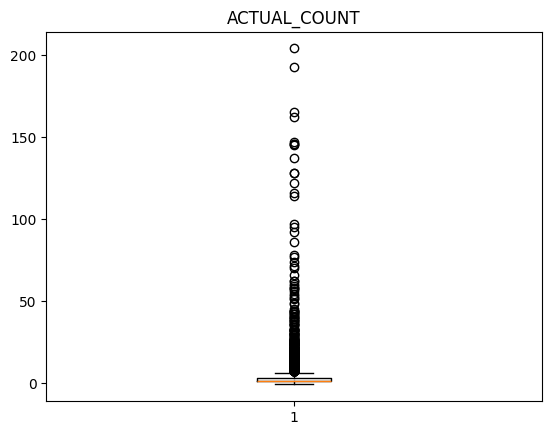

In [33]:
import matplotlib.pyplot as plt

# Boxplot for 'ACTUAL_COUNT'
plt.boxplot(df['ACTUAL_COUNT'])
plt.title("ACTUAL_COUNT")
plt.show()


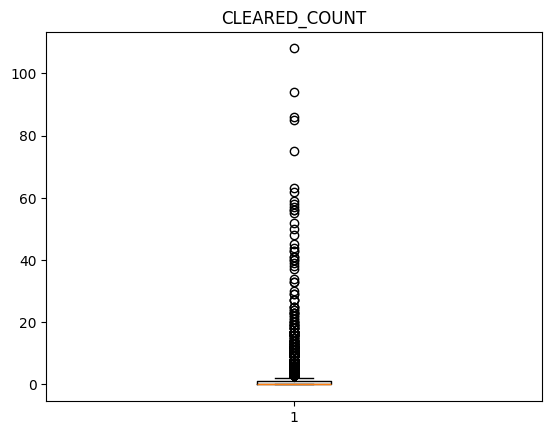

In [34]:
plt.boxplot(df['CLEARED_COUNT'])
plt.title("CLEARED_COUNT")
plt.show()


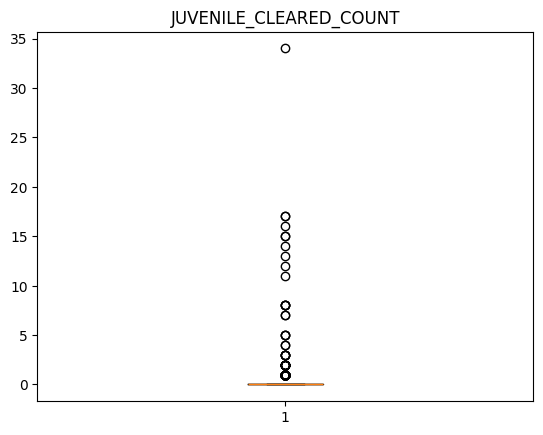

In [35]:
plt.boxplot(df['JUVENILE_CLEARED_COUNT'])
plt.title("JUVENILE_CLEARED_COUNT")
plt.show()

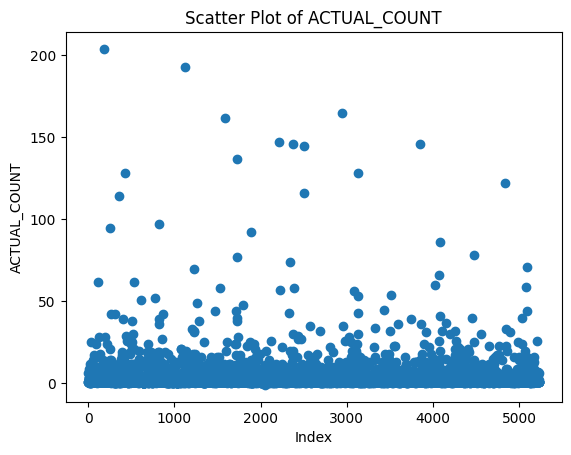

In [36]:
plt.scatter(df.index, df['ACTUAL_COUNT'])
plt.xlabel("Index")
plt.ylabel("ACTUAL_COUNT")
plt.title("Scatter Plot of ACTUAL_COUNT")
plt.show()


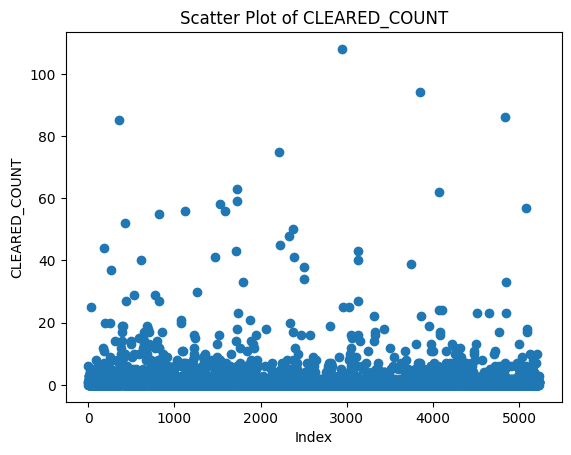

In [37]:
plt.scatter(df.index, df['CLEARED_COUNT'])
plt.xlabel("Index")
plt.ylabel("CLEARED_COUNT")
plt.title("Scatter Plot of CLEARED_COUNT")
plt.show()

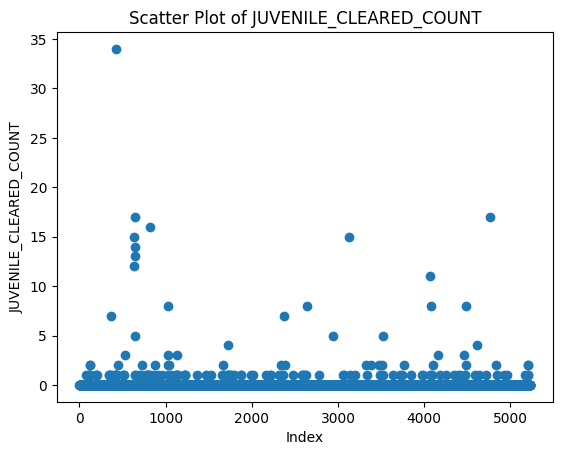

In [38]:
plt.scatter(df.index, df['JUVENILE_CLEARED_COUNT'])
plt.xlabel("Index")
plt.ylabel("JUVENILE_CLEARED_COUNT")
plt.title("Scatter Plot of JUVENILE_CLEARED_COUNT")
plt.show()

<Axes: >

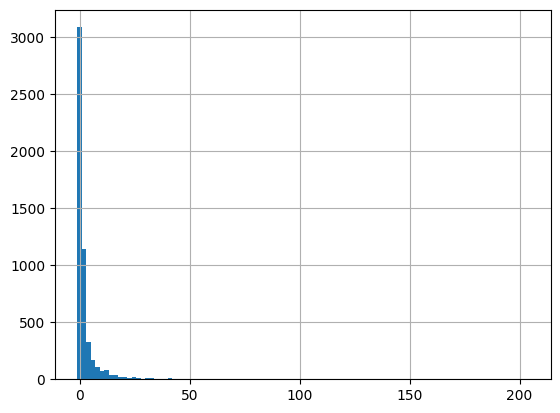

In [39]:
df['ACTUAL_COUNT'].hist(bins=100)

<Axes: >

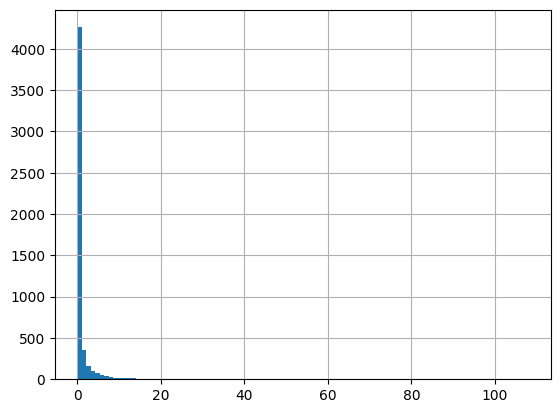

In [40]:
df['CLEARED_COUNT'].hist(bins=100)

<Axes: >

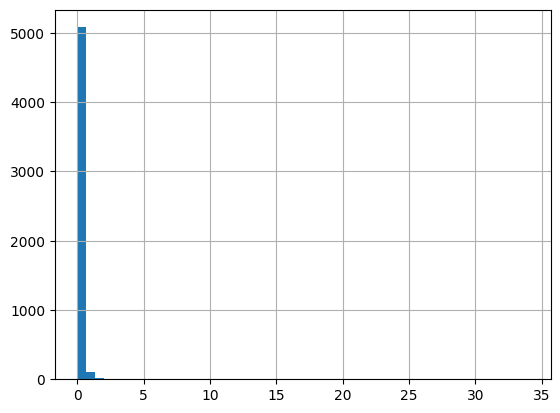

In [41]:
df['JUVENILE_CLEARED_COUNT'].hist(bins=50)

In [42]:
import numpy as np

In [43]:
df['ACTUAL_COUNT'] = np.clip(df['ACTUAL_COUNT'], 0, 6)


In [44]:
df['CLEARED_COUNT'] = np.clip(df['CLEARED_COUNT'], 0, 2.5)


In [45]:
df['JUVENILE_CLEARED_COUNT'] = np.clip(df['JUVENILE_CLEARED_COUNT'], 0, 10)

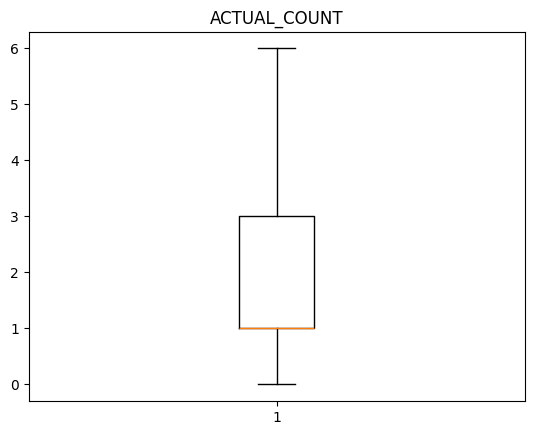

In [46]:
import matplotlib.pyplot as plt

# Boxplot for 'ACTUAL_COUNT'
plt.boxplot(df['ACTUAL_COUNT'])
plt.title("ACTUAL_COUNT")
plt.show()

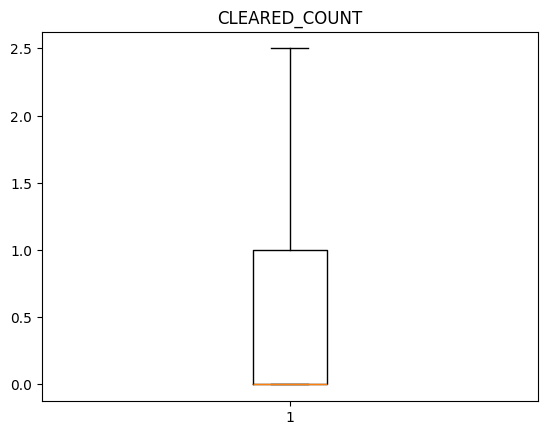

In [47]:
plt.boxplot(df['CLEARED_COUNT'])
plt.title("CLEARED_COUNT")
plt.show()


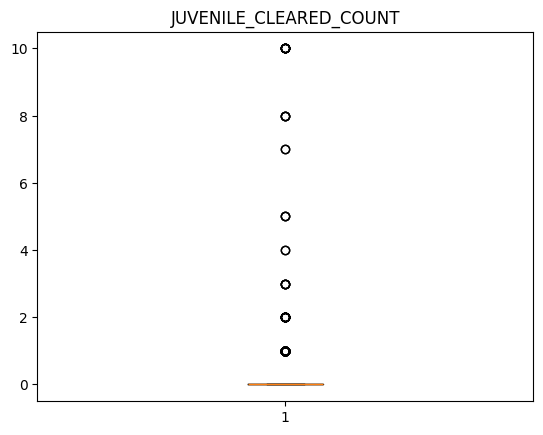

In [48]:
plt.boxplot(df['JUVENILE_CLEARED_COUNT'])
plt.title("JUVENILE_CLEARED_COUNT")
plt.show()

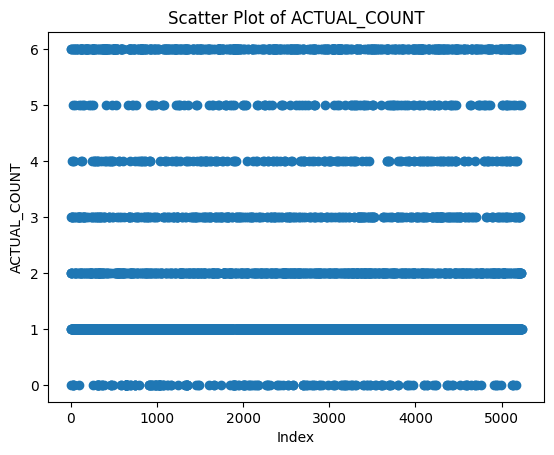

In [49]:
plt.scatter(df.index, df['ACTUAL_COUNT'])
plt.xlabel("Index")
plt.ylabel("ACTUAL_COUNT")
plt.title("Scatter Plot of ACTUAL_COUNT")
plt.show()

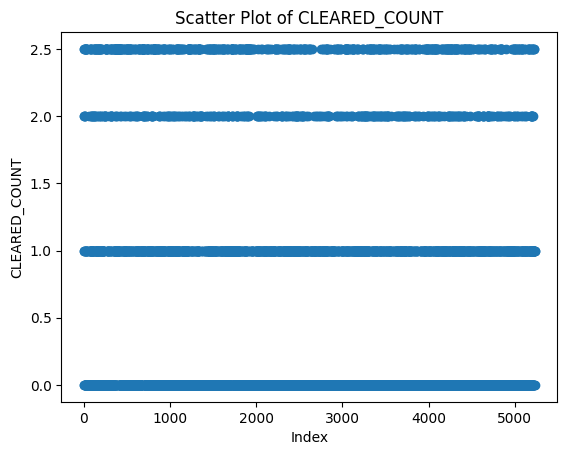

In [50]:
plt.scatter(df.index, df['CLEARED_COUNT'])
plt.xlabel("Index")
plt.ylabel("CLEARED_COUNT")
plt.title("Scatter Plot of CLEARED_COUNT")
plt.show()

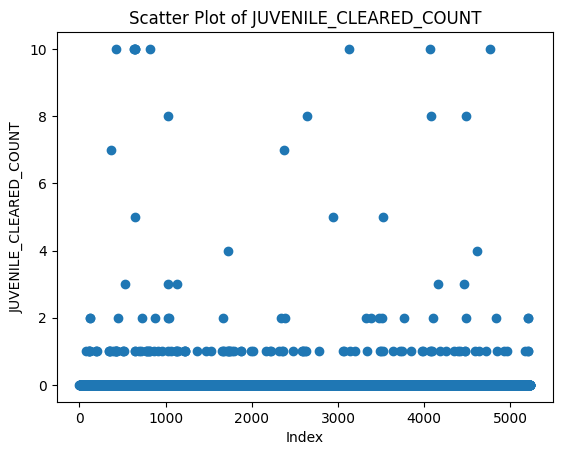

In [51]:
plt.scatter(df.index, df['JUVENILE_CLEARED_COUNT'])
plt.xlabel("Index")
plt.ylabel("JUVENILE_CLEARED_COUNT")
plt.title("Scatter Plot of JUVENILE_CLEARED_COUNT")
plt.show()

Task-2

In [52]:
#statistical summary/aggregated
summary_stats = df[['ACTUAL_COUNT', 'CLEARED_COUNT', 'JUVENILE_CLEARED_COUNT']].describe()


In [53]:
print(summary_stats)

       ACTUAL_COUNT  CLEARED_COUNT  JUVENILE_CLEARED_COUNT
count   5233.000000    5233.000000             5233.000000
mean       2.107586       0.685458                0.063252
std        1.796745       0.891770                0.565318
min        0.000000       0.000000                0.000000
25%        1.000000       0.000000                0.000000
50%        1.000000       0.000000                0.000000
75%        3.000000       1.000000                0.000000
max        6.000000       2.500000               10.000000


- Are cases with higher ACTUAL_COUNT more likely to have higher CLEARED_COUNT?
- Do regions differ significantly in ACTUAL_COUNT of human trafficking cases?

In [54]:
#Are cases with higher ACTUAL_COUNT more likely to have higher CLEARED_COUNT?
#Do regions differ significantly in ACTUAL_COUNT of human trafficking cases?

In [55]:
 #Step 2: Develop Two Interesting Questions/Hypotheses and Answer via Code

# Hypothesis 1: "Are cases with higher ACTUAL_COUNT more likely to have higher CLEARED_COUNT?"
# Calculate correlation between ACTUAL_COUNT and CLEARED_COUNT
correlation_actual_cleared = df[['ACTUAL_COUNT', 'CLEARED_COUNT']].corr().iloc[0,1]

# Hypothesis 2: "Do regions differ significantly in ACTUAL_COUNT of human trafficking cases?"
# Calculate the average number of human trafficking cases (ACTUAL_COUNT) per region
region_aggregated = df.groupby("REGION_NAME")["ACTUAL_COUNT"].mean().sort_values(ascending=False)



In [56]:
print(correlation_actual_cleared)
print(region_aggregated)


0.5217121589220239
REGION_NAME
Other               3.416667
West                2.437055
South               2.168433
Midwest             1.979730
Northeast           1.553106
U.S. Territories    1.000000
Name: ACTUAL_COUNT, dtype: float64


1. Moderate Positive Correlation (0.52) Between ACTUAL_COUNT and CLEARED_COUNT

- The correlation of 0.52 indicates that as the number of reported cases (ACTUAL_COUNT) increases, the number of cleared cases (CLEARED_COUNT) also tends to increase.
- However, since it's only a moderate correlation, it implies that other factors also influence case resolution. These could include law enforcement efficiency, resources available, case complexity, or regional policies.

2. Regional Differences in Human Trafficking Cases (ACTUAL_COUNT)

- The ranking of human trafficking cases by region shows that "Other" regions have the highest number of reported cases on average, followed by the West, South, Midwest, Northeast, and U.S. Territories.
- U.S. Territories have the lowest ACTUAL_COUNT, which could suggest:
  - A smaller population, leading to fewer overall cases.
  - Underreporting or lack of proper mechanisms to track cases.
  - Differences in how cases are classified or recorded across regions.

**Key Takeaways for Stakeholders:**
- For Police Officials & Border Control Officers:

 - The moderate correlation suggests that while reporting more cases can lead to more clearances, investigative efficiency and resources also play a role.
 - The disparity across regions may indicate the need for enhanced reporting mechanisms in certain areas, particularly in U.S. Territories.
- For News Media:

 - The regional differences in case numbers could indicate potential systemic underreporting issues, which might be a story angle worth exploring.
 - The correlation finding highlights that increased law enforcement efforts may not always result in a proportional increase in cleared cases.-

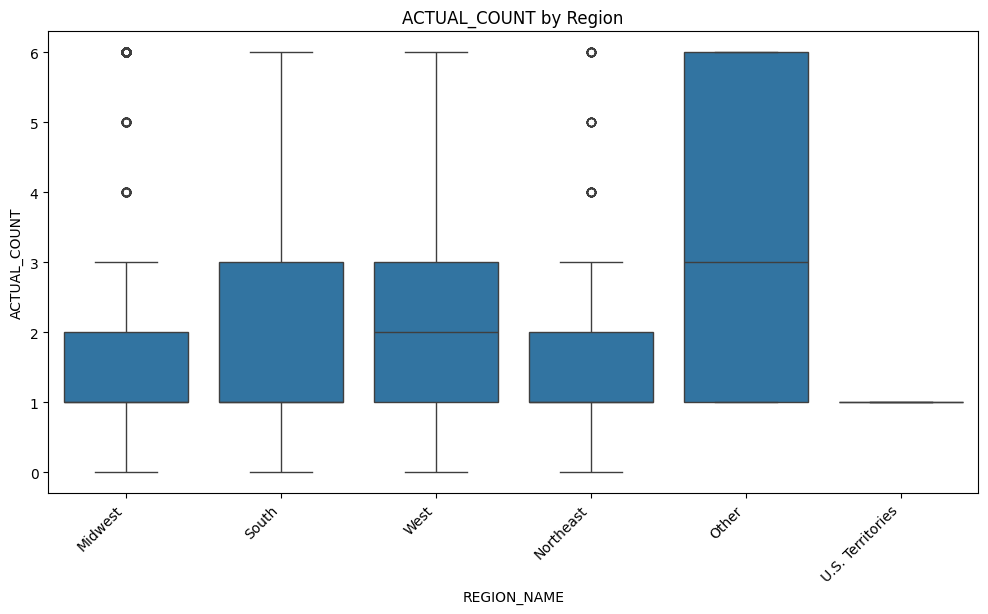

In [57]:
import seaborn as sns

region_actual_count_df = df[['REGION_NAME', 'ACTUAL_COUNT']]

plt.figure(figsize=(12, 6))
sns.boxplot(x='REGION_NAME', y='ACTUAL_COUNT', data=region_actual_count_df)
plt.title("ACTUAL_COUNT by Region")
plt.xticks(rotation=45, ha='right')
plt.show()

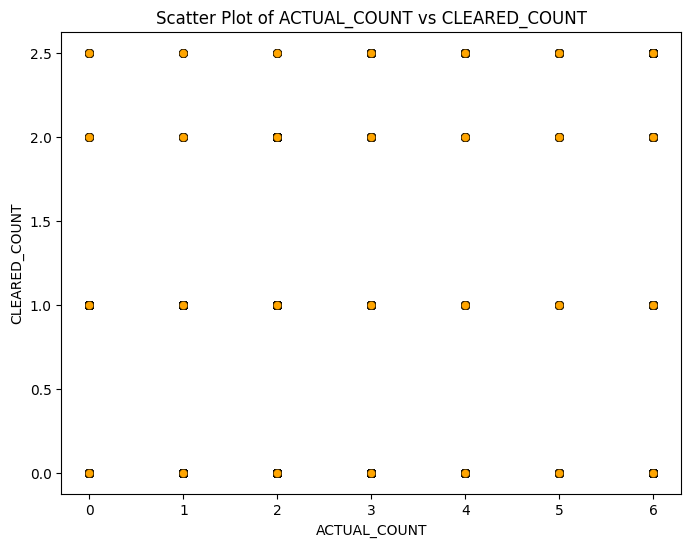

In [58]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["ACTUAL_COUNT"], y=df["CLEARED_COUNT"], alpha=0.5, color="orange", edgecolor="black")


plt.xlabel("ACTUAL_COUNT")
plt.ylabel("CLEARED_COUNT")
plt.title("Scatter Plot of ACTUAL_COUNT vs CLEARED_COUNT")


plt.show()


Task 3

**New Feature Created:** CLEARANCE_RATE & CLEARANCE_CATEGORY:<br>
I have derived two new features based on ACTUAL_COUNT and CLEARED_COUNT, which will be useful for stakeholders.</br>

1. CLEARANCE_RATE (Numeric)
**- Formula:** CLEARED_COUNT / ACTUAL_COUNT<br>
**- Purpose:** Shows the percentage of cases cleared per total cases reported.<br>
**- Values:**
- If ACTUAL_COUNT = 6 and CLEARED_COUNT = 6, then CLEARANCE_RATE = 1.0 (100% clearance).
- If ACTUAL_COUNT = 1 and CLEARED_COUNT = 0, then CLEARANCE_RATE = 0.0 (No clearance).
2. CLEARANCE_CATEGORY (String)
**Categorized as:**
- "No Clearance" (0% clearance)
- "Low Clearance" (<25%)
- "Moderate Clearance" (25% - 75%)
- "High Clearance" (>75%)


In [59]:
import numpy as np
df['CLEARANCE_RATE'] = np.where(df['ACTUAL_COUNT'] > 0, (df['CLEARED_COUNT'] / df['ACTUAL_COUNT'])*100, 0)

# Categorize clearance efficiency into levels
def categorize_clearance(rate):
    if rate == 0:
        return "No Clearance"
    elif rate < 0.25:
        return "Low Clearance"
    elif rate < 0.75:
        return "Moderate Clearance"
    else:
        return "High Clearance"

df['CLEARANCE_CATEGORY'] = df['CLEARANCE_RATE'].apply(categorize_clearance)


In [60]:
df['CLEARANCE_RATE'].value_counts()

,count
CLEARANCE_RATE,
0.000000,3082
100.000000,1034
41.666667,415
50.000000,213
33.333333,122
16.666667,71
83.333333,69
62.500000,57
66.666667,49


Here i noted cleared count in some rows is more than the actual count which can be discrepency in data. So i planned to drop the rows where Cleared count is more than actaual count for accuracy.

In [61]:
df[df['CLEARANCE_RATE']==250.000000][['CLEARANCE_RATE','ACTUAL_COUNT','CLEARED_COUNT']]

,CLEARANCE_RATE,ACTUAL_COUNT,CLEARED_COUNT
551,250.0,1,2.5
798,250.0,1,2.5
2524,250.0,1,2.5
3409,250.0,1,2.5
3429,250.0,1,2.5
3438,250.0,1,2.5
3744,250.0,1,2.5
3894,250.0,1,2.5
4188,250.0,1,2.5
4585,250.0,1,2.5


In [62]:
df[df['CLEARANCE_RATE']==125.000000][['CLEARANCE_RATE','ACTUAL_COUNT','CLEARED_COUNT']]

,CLEARANCE_RATE,ACTUAL_COUNT,CLEARED_COUNT
692,125.0,2,2.5
1162,125.0,2,2.5
1207,125.0,2,2.5
2474,125.0,2,2.5
2593,125.0,2,2.5
2853,125.0,2,2.5
3063,125.0,2,2.5
3433,125.0,2,2.5
3473,125.0,2,2.5
4339,125.0,2,2.5


In [63]:

df[df['CLEARANCE_RATE']==125.000000][['CLEARANCE_RATE','ACTUAL_COUNT','CLEARED_COUNT']]
df[df['CLEARANCE_RATE']==200.000000][['CLEARANCE_RATE','ACTUAL_COUNT','CLEARED_COUNT']]

,CLEARANCE_RATE,ACTUAL_COUNT,CLEARED_COUNT
177,200.0,1,2.0
240,200.0,1,2.0
789,200.0,1,2.0
790,200.0,1,2.0
1042,200.0,1,2.0
1148,200.0,1,2.0
1919,200.0,1,2.0
2050,200.0,1,2.0
2297,200.0,1,2.0
2470,200.0,1,2.0


In [64]:
import numpy as np
# Drop rows where CLEARANCE_RATE is more than 125
import numpy as np

df = df[np.isclose(df['CLEARANCE_RATE'], 124.000000, atol=1e-5) | (df['CLEARANCE_RATE'] < 125.000000)]

In [65]:
df['CLEARANCE_RATE'].value_counts()

,count
CLEARANCE_RATE,
0.000000,3082
100.000000,1034
41.666667,415
50.000000,213
33.333333,122
16.666667,71
83.333333,69
62.500000,57
66.666667,49


Task-4

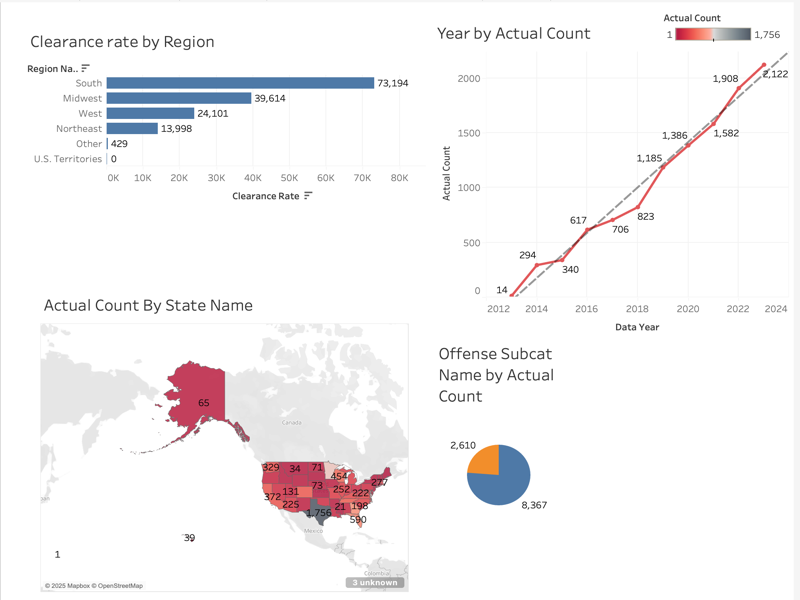

In [66]:
from IPython.display import display
from PIL import Image

img_path = "/content/drive/MyDrive/intro_data_science/Image-12.png"  # Update with actual path
img = Image.open(img_path)
new_size = (800, 600)  # (width, height)
resized_img = img.resize(new_size)

# Display resized image
display(resized_img)


- This dashboard is useful for U.S. Border Control Officers because it helps them understand where and when human trafficking is happening the most. Here’s how:

**Tracking Clearance Rates by Region.**

- The bar chart shows how well different regions are solving trafficking cases.
- The South and Midwest have high clearance rates, meaning cases there are being resolved more often.
- U.S. Territories show zero clearance, which could mean cases aren’t being reported properly or solved.

**Seeing the Increase in Cases Over Time.**

- The line graph shows that trafficking cases have increased every year from 2014 to 2023.
- Border control can use this to prepare for more cases in the future and increase security during peak times.

**Identifying High-Risk States.**

- The map highlights which states have the most cases.
Border states like Texas, Arizona, and California have high numbers, meaning they are likely major trafficking routes.
- Officers can use this to focus more on these areas and tighten border security.

**Understanding the Types of Cases**

- The pie chart shows how cases are divided into different types.
- If many cases involve smuggling or illegal border crossings, officers can adjust their strategies to stop these crimes.
- What Border Control Officers Can Do with This Data:
- Pay more attention to high-risk border states.
- Work with local police in regions with low clearance rates.
- Prepare for more trafficking cases in the future based on trends.
- Investigate U.S. Territories to see why so few cases are cleared.